In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('train.csv')

combine = [X_train, X_test]

In [3]:
X_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [4]:
X_train.info()
print('-'*40)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB
----------------------------------------


In [5]:
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [6]:
X_train[['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].describe()

,marital,education,default,housing,loan,contact,month,poutcome
count,31647,31647,31647,31647,31647,31647,31647,31647
unique,3,4,2,2,2,3,12,4
top,married,secondary,no,yes,no,cellular,may,unknown
freq,19095,16224,31062,17584,26516,20423,9669,25929


In [7]:
X_train['subscribed'].mean()

0.11738869403102979

In [8]:
X_train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [9]:
X_train[['marital', 'subscribed']].groupby(['marital'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,marital,subscribed
2,single,0.151423
0,divorced,0.122590
1,married,0.100498


In [10]:
X_train[['education', 'subscribed']].groupby(['education'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,education,subscribed
2,tertiary,0.152134
3,unknown,0.133942
1,secondary,0.104598
0,primary,0.088810


In [11]:
X_train[['housing', 'subscribed']].groupby(['housing'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,housing,subscribed
0,no,0.168172
1,yes,0.076774


In [12]:
X_train[['loan', 'subscribed']].groupby(['loan'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,loan,subscribed
0,no,0.127621
1,yes,0.064510


In [13]:
X_train[['contact', 'subscribed']].groupby(['contact'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,contact,subscribed
0,cellular,0.150370
1,telephone,0.130923
2,unknown,0.040972


In [14]:
X_train[['job', 'subscribed']].groupby(['job'], as_index=False).mean().sort_values(by='subscribed', ascending=False)

,job,subscribed
8,student,0.286614
5,retired,0.229987
10,unemployed,0.142541
4,management,0.139027
11,unknown,0.126214
6,self-employed,0.124666
0,admin.,0.124484
9,technician,0.111928
3,housemaid,0.090389
7,services,0.087496


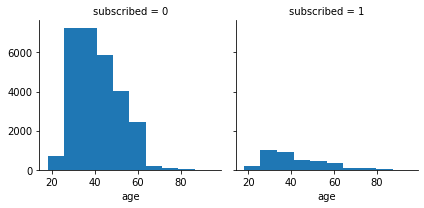

In [15]:
g = sn.FacetGrid(X_train, col='subscribed')
g.map(plt.hist, 'age', bins=10)

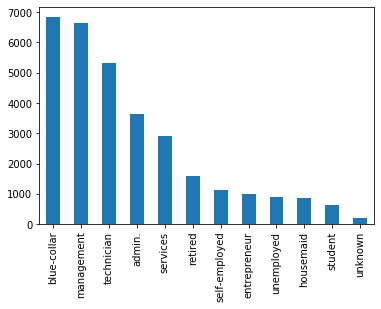

In [16]:
X_train['job'].value_counts().plot.bar()

subscribed        0    1
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

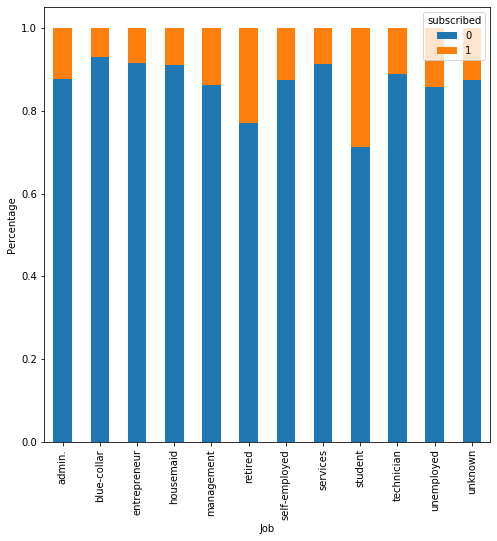

In [17]:
print(pd.crosstab(X_train['job'],X_train['subscribed']))

job=pd.crosstab(X_train['job'],X_train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [18]:
# let's get started
for daset in combine:
    daset['job'] = daset['job'].replace(['student', 'retired','unemployed'], 3)
    daset['job'] = daset['job'].replace(['management', 'unknown','self-employed'], 2)
    daset['job'] = daset['job'].replace(['admin.', 'technician','housemaid'], 1)
    daset['job'] = daset['job'].replace(['services', 'entrepreneur','blue-collar'], 0)


In [19]:
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [20]:
for daset in combine:
    daset['marital'] = daset['marital'].replace('single', 2)
    daset['marital'] = daset['marital'].replace('divorced', 1)
    daset['marital'] = daset['marital'].replace('married', 0)

X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,0,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [21]:
for daset in combine:
    daset['education'] = daset['education'].replace('tertiary', 3)
    daset['education'] = daset['education'].replace('unknown', 2)
    daset['education'] = daset['education'].replace('secondary', 1)
    daset['education'] = daset['education'].replace('primary', 0)

X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,2,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,1,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,1,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,3,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,0,1,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [22]:
for daset in combine:
    daset['default'] = daset['default'].replace('no', 0)
    daset['default'] = daset['default'].replace('yes', 1)
    
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,2,0,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,1,0,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,1,0,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,3,0,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,0,1,0,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [23]:
for daset in combine:
    daset['housing'] = daset['housing'].replace('no', 0)
    daset['housing'] = daset['housing'].replace('yes', 1)
    
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,2,0,1933,0,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,1,0,3,0,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,1,0,891,1,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,3,0,3287,0,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,0,1,0,119,1,no,cellular,4,feb,380,1,-1,0,unknown,0


In [24]:
for daset in combine:
    daset['loan'] = daset['loan'].replace('no', 1)
    daset['loan'] = daset['loan'].replace('yes', 0)
    
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,2,0,1933,0,1,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,1,0,3,0,1,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,1,0,891,1,1,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,3,0,3287,0,1,cellular,22,jun,867,1,84,3,success,1
4,29842,31,1,0,1,0,119,1,1,cellular,4,feb,380,1,-1,0,unknown,0


In [25]:
for daset in combine:
    daset['contact'] = daset['contact'].replace('cellular', 2)
    daset['contact'] = daset['contact'].replace('telephone', 1)
    daset['contact'] = daset['contact'].replace('unknown', 0)
    
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,1,0,2,0,1933,0,1,1,19,nov,44,2,-1,0,unknown,0
1,40576,31,2,0,1,0,3,0,1,2,20,jul,91,2,-1,0,unknown,0
2,15320,27,0,0,1,0,891,1,1,2,18,jul,240,1,-1,0,unknown,0
3,43962,57,2,1,3,0,3287,0,1,2,22,jun,867,1,84,3,success,1
4,29842,31,1,0,1,0,119,1,1,2,4,feb,380,1,-1,0,unknown,0


In [26]:
X_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [27]:
X_train['age']

0        56
1        31
2        27
3        57
4        31
         ..
31642    29
31643    53
31644    32
31645    57
31646    55
Name: age, Length: 31647, dtype: int64

In [28]:
print("Before", X_train.shape, X_test.shape, combine[0].shape, combine[1].shape)

X_train = X_train.drop(['day', 'month', 'duration', 'pdays', 'poutcome'], axis=1)
X_test = X_test.drop(['day', 'month', 'duration', 'pdays', 'poutcome'], axis=1)
combine = [X_train, X_test]

"After", X_train.shape, X_test.shape, combine[0].shape, combine[1].shape

Before (31647, 18) (31647, 18) (31647, 18) (31647, 18)


('After', (31647, 13), (31647, 13), (31647, 13), (31647, 13))

In [29]:
X_train['ageBand'] = pd.cut(X_train['age'], 5)
X_train[['ageBand', 'subscribed']].groupby(['ageBand'], as_index=False).mean().sort_values(by='ageBand', ascending=True)

,ageBand,subscribed
0,"(17.923, 33.4]",0.135632
1,"(33.4, 48.8]",0.097111
2,"(48.8, 64.2]",0.112206
3,"(64.2, 79.6]",0.409091
4,"(79.6, 95.0]",0.388889


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 33, 'age'] = 0
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 48), 'age'] = 1
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 2
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 79), 'age'] = 3
    dataset.loc[ dataset['age'] > 79, 'age']
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,subscribed,ageBand
0,26110,2,1,0,2,0,1933,0,1,1,2,0,0,"(48.8, 64.2]"
1,40576,0,2,0,1,0,3,0,1,2,2,0,0,"(17.923, 33.4]"
2,15320,0,0,0,1,0,891,1,1,2,1,0,0,"(17.923, 33.4]"
3,43962,2,2,1,3,0,3287,0,1,2,1,3,1,"(48.8, 64.2]"
4,29842,0,1,0,1,0,119,1,1,2,1,0,0,"(17.923, 33.4]"


In [31]:
X_train = X_train.drop(['ageBand'], axis=1)
combine = [X_train, X_test]
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,subscribed
0,26110,2,1,0,2,0,1933,0,1,1,2,0,0
1,40576,0,2,0,1,0,3,0,1,2,2,0,0
2,15320,0,0,0,1,0,891,1,1,2,1,0,0
3,43962,2,2,1,3,0,3287,0,1,2,1,3,1
4,29842,0,1,0,1,0,119,1,1,2,1,0,0


In [32]:
X_train['balanceBand'] = pd.cut(X_train['balance'], 5)
X_train[['balanceBand', 'subscribed']].groupby(['balanceBand'], as_index=False).mean().sort_values(by='balanceBand', ascending=True)

,balanceBand,subscribed
0,"(-8129.146, 14010.2]",0.117263
1,"(14010.2, 36039.4]",0.127049
2,"(36039.4, 58068.6]",0.173913
3,"(58068.6, 80097.8]",0.000000
4,"(80097.8, 102127.0]",0.500000


In [33]:
for dataset in combine:    
    dataset.loc[ dataset['balance'] <= 14010, 'balance'] = 10
    dataset.loc[(dataset['balance'] > 14010) & (dataset['balance'] <= 36039), 'balance'] = 20
    dataset.loc[(dataset['balance'] > 36039) & (dataset['balance'] <= 58068), 'balance'] = 30
    dataset.loc[(dataset['balance'] > 58068) & (dataset['balance'] <= 80097), 'balance'] = 40
    dataset.loc[ dataset['balance'] > 80097, 'balance'] = 50
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,subscribed,balanceBand
0,26110,2,1,0,2,0,10,0,1,1,2,0,0,"(-8129.146, 14010.2]"
1,40576,0,2,0,1,0,10,0,1,2,2,0,0,"(-8129.146, 14010.2]"
2,15320,0,0,0,1,0,10,1,1,2,1,0,0,"(-8129.146, 14010.2]"
3,43962,2,2,1,3,0,10,0,1,2,1,3,1,"(-8129.146, 14010.2]"
4,29842,0,1,0,1,0,10,1,1,2,1,0,0,"(-8129.146, 14010.2]"


In [34]:
X_train = X_train.drop(['balanceBand'], axis=1)
combine = [X_train, X_test]
X_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,subscribed
0,26110,2,1,0,2,0,10,0,1,1,2,0,0
1,40576,0,2,0,1,0,10,0,1,2,2,0,0
2,15320,0,0,0,1,0,10,1,1,2,1,0,0
3,43962,2,2,1,3,0,10,0,1,2,1,3,1
4,29842,0,1,0,1,0,10,1,1,2,1,0,0


In [35]:
train_df = X_train.drop(['ID'], axis=1)
test_df = X_test.drop(['ID'], axis=1)
combine = [train_df, test_df]

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous,subscribed
0,2,1,0,2,0,10,0,1,1,2,0,0
1,0,2,0,1,0,10,0,1,2,2,0,0
2,0,0,0,1,0,10,1,1,2,1,0,0
3,2,2,1,3,0,10,0,1,2,1,3,1
4,0,1,0,1,0,10,1,1,2,1,0,0


In [36]:
y_target = X_train['subscribed']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df, y_target, test_size = 0.3, random_state=10)

In [38]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [39]:
prediction = lreg.predict(X_val)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)

1.0

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [42]:
predict = clf.predict(X_val)
accuracy_score(y_val, predict)

1.0

In [43]:
test_prediction = clf.predict(test_df)

In [44]:
submission2 = pd.DataFrame()

In [45]:
submission2['ID'] = X_test['ID']
submission2['subscribed'] = test_prediction

In [46]:
submission2.to_csv('submission_final.csv', header=True, index=False)